# Decision trees classifier

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import cross_val_score

from IPython.display import Image

from sklearn.externals.six import StringIO


C:\Users\felip\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
rank=pd.read_excel('high_diamond_ranked_10min.xlsx')
rank.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [5]:
#Tiramos a coluna gameID, posi não é necessaria na nossa análise visto que o que queremos são os dados do jogo e não 
#o seu respectivo código 
ranked=rank.drop(columns=['gameId'])
ranked.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


## Metodologia decision trees classifier

A partir do decison trees classifier vamos ver as probabilidades de cada variavle somada a fim de obter uma maior precisão na decisão de um jogo. A ideia é ir com base em cada pequena decisão tomada por cada time avaliar a probabilidade desse time ganhar a partida.

In [10]:
arvores = DecisionTreeRegressor()

In [14]:
feature_cols = ['blueWardsPlaced','blueWardsDestroyed','blueFirstBlood','blueKills','blueDeaths','blueAssists','blueEliteMonsters','blueDragons','blueHeralds','blueTowersDestroyed','blueTotalGold','blueAvgLevel','blueTotalExperience','blueTotalMinionsKilled','blueTotalJungleMinionsKilled','blueGoldDiff','blueExperienceDiff','blueCSPerMin','blueGoldPerMin'
]
x = ranked[feature_cols] #features
y = ranked['blueWins']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [16]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [17]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [21]:
#Score vai nos dar a acuracia de nossa predição
score = clf.score(x_test, y_test)
print(score)

0.7327935222672065


In [34]:
#Lista de valores referentes a cada pergunta da tree (max_depth):
max_depth_range = list(range(1, 10))

accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
   # clf.fit(x_train, y_train)
   # score = clf.score(x_train, y_train)
    score = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 10 )
    score = score.mean()
    accuracy.append(score)
accuracy

[0.7173713389502863,
 0.7173713389502863,
 0.7168309807783493,
 0.7200707590181274,
 0.716427399058978,
 0.7125146806725754,
 0.7036046978152242,
 0.6996907028485977,
 0.6863281905387169]

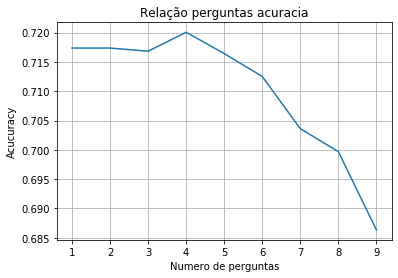

In [35]:
plt.plot(max_depth_range, accuracy)
plt.xlabel('Numero de perguntas')
plt.ylabel('Acucuracy')
plt.title('Relação perguntas acuracia')
plt.grid(True)
plt.show()

In [ ]:
#validação cruzada